In [1]:
from torch.nn import CrossEntropyLoss
from transformer import TransformerMT
from torch import optim
from data_loader import *
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

data = EnFrDataset(used_abridged_data=True, max_seq_length=100)

Reading the dataframe and storing untokenized pairs...


100%|████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 94292.16it/s]


Adding sentences to Langs amd geting data pairs...


100%|█████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2125.74it/s]


Creating tokenized pairs of english and french sentences...


100%|█████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6281.46it/s]


In [1]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# data = EnFrDataset(used_abridged_data=True, max_seq_length=100)

train_dataloader = DataLoader(data, batch_size=32, shuffle=False, num_workers=0)

transformer_mt = TransformerMT(
    source_vocabulary_size=data.get_src_lang_size(),
    target_vocabulary_size=data.get_tgt_lang_size(),
    embedding_size=512,
    max_num_embeddings=100,
    num_attention_heads=8,
    num_encoder_layers=6,
    num_decoder_layers=6,
    linear_layer_size=2048,
    dropout=0.1,
    activation='relu',
    layer_norm_eps=1e-5,
    batch_first=False,
    norm_first=False,
    bias=True
)
transformer_mt.to(device)

transformer_mt.train()

optimizer = optim.Adam(transformer_mt.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

loss_criterion = CrossEntropyLoss(ignore_index=0)

epoch_losses = []
for e in range(30):
    transformer_mt
    running_loss = 0
    for en_token_ids, fr_token_ids in train_dataloader:
        en_token_ids = en_token_ids.to(device)
        fr_token_ids = fr_token_ids.to(device)

        optimizer.zero_grad()

        output = transformer_mt(src=en_token_ids, tgt=fr_token_ids[:-1, :])
        
        loss = loss_criterion(output.reshape(-1, output.shape[-1]), fr_token_ids[1:, :].reshape(-1))
    
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()

    epoch_losses.append(running_loss)
    print(f"epoch: {e+1}, epoch loss: {round(running_loss, 3)}")

Reading the dataframe and storing untokenized pairs...


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 94973.26it/s]


Adding sentences to Langs amd geting data pairs...


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2231.28it/s]


Creating tokenized pairs of english and french sentences...


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6627.37it/s]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


epoch: 1, epoch loss: 79.484
epoch: 2, epoch loss: 60.246
epoch: 3, epoch loss: 58.023
epoch: 4, epoch loss: 57.432
epoch: 5, epoch loss: 57.208
epoch: 6, epoch loss: 56.794
epoch: 7, epoch loss: 56.692
epoch: 8, epoch loss: 56.54
epoch: 9, epoch loss: 56.379
epoch: 10, epoch loss: 56.188
epoch: 11, epoch loss: 55.987
epoch: 12, epoch loss: 55.791
epoch: 13, epoch loss: 55.639
epoch: 14, epoch loss: 55.385
epoch: 15, epoch loss: 55.319
epoch: 16, epoch loss: 55.236
epoch: 17, epoch loss: 55.007
epoch: 18, epoch loss: 54.771
epoch: 19, epoch loss: 54.612
epoch: 20, epoch loss: 54.344
epoch: 21, epoch loss: 54.108
epoch: 22, epoch loss: 53.889
epoch: 23, epoch loss: 53.648
epoch: 24, epoch loss: 53.207
epoch: 25, epoch loss: 52.732
epoch: 26, epoch loss: 52.459
epoch: 27, epoch loss: 52.086
epoch: 28, epoch loss: 51.65
epoch: 29, epoch loss: 51.228
epoch: 30, epoch loss: 50.736


[79.48429918289185, 60.246424078941345, 58.02264338731766, 57.43153589963913, 57.20792329311371, 56.79440367221832, 56.69172239303589, 56.54026186466217, 56.37879538536072, 56.18778908252716, 55.987387120723724, 55.7905735373497, 55.63920336961746, 55.38463997840881, 55.31938987970352, 55.236328125, 55.00738447904587, 54.770721673965454, 54.61197257041931, 54.34409111738205, 54.108228862285614, 53.88939696550369, 53.64780843257904, 53.206848323345184, 52.73204916715622, 52.459000289440155, 52.086347699165344, 51.649870455265045, 51.22798240184784, 50.735808193683624]


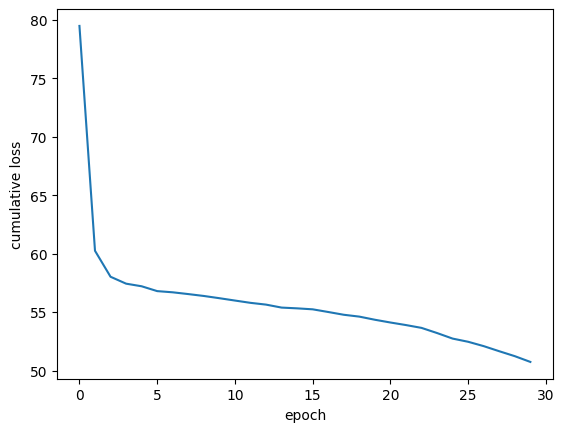

<Figure size 640x480 with 0 Axes>

In [2]:
print(epoch_losses)
plt.plot(epoch_losses)
plt.ylabel('cumulative loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('epoch_losses.png')

Reading the dataframe and storing untokenized pairs...


100%|████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 99231.19it/s]


Adding sentences to Langs amd geting data pairs...


100%|█████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2102.38it/s]


Creating tokenized pairs of english and french sentences...


100%|█████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6319.28it/s]


1000
800
0 800
900
800 900
1000
900 1000


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


e: 1, train_loss: 8.587
e: 2, train_loss: 5.304
e: 3, train_loss: 4.246
e: 4, train_loss: 0.917
e: 5, train_loss: 0.604
e: 6, train_loss: 0.513
e: 7, train_loss: 4.41
e: 8, train_loss: 4.268
e: 9, train_loss: 4.061
e: 10, train_loss: 3.709
train_losses: [8.587, 5.304, 4.246, 0.917, 0.604, 0.513, 4.41, 4.268, 4.061, 3.709]


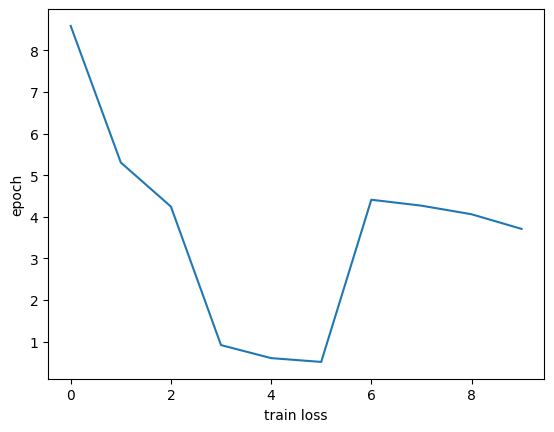

In [2]:
from TrainEval import TrainEval
from DataLoaderProvider import DataLoaderProvider

dataloader_provider = DataLoaderProvider(
    use_abridged_dataset=True,
    batch_size=32
)

model = transformer_mt = TransformerMT(
    source_vocabulary_size=data.get_src_lang_size(),
    target_vocabulary_size=data.get_tgt_lang_size(),
    embedding_size=512,
    max_num_embeddings=100,
    num_attention_heads=8,
    num_encoder_layers=6,
    num_decoder_layers=6,
    linear_layer_size=2048,
    dropout=0.1,
    activation='relu',
    layer_norm_eps=1e-5,
    batch_first=False,
    norm_first=False,
    bias=True
)

train_eval = TrainEval(
    dataloader_provider=dataloader_provider,
    num_epochs=10,
    optimizer=optim.Adam(transformer_mt.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9),
    loss_function=CrossEntropyLoss(ignore_index=0),
    model=model
)

train_eval.execute()